In [1]:
# import pandas as pd
# from sentence_transformers import SentenceTransformer
# import os
# from tqdm import tqdm
# import numpy as np

# BATCH_SIZE = 2048

# full_map_data = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/full_data_map_data.csv')
# print(full_map_data.columns)

# model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

# sentences = ['search_document: ' + text for text in full_map_data['texts']]


# # Process in batches
# for i in tqdm(range(0, len(sentences), BATCH_SIZE)):
#     batch = sentences[i:i+BATCH_SIZE]
#     batch_embeddings = model.encode(batch)
    
#     # Save batch embeddings
#     batch_number = i // BATCH_SIZE
#     np.save(f'/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/embedding_batch_{batch_number}.npy', batch_embeddings)


In [2]:
# import numpy as np
# import glob
# from openTSNE import TSNE
# import os

# # Get all npy files in the data directory
# npy_files = sorted(glob.glob('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/embedding_batch_*.npy'), 
#                    key=lambda x: int(x.split('_')[-1].split('.')[0]))

# # Load and stack the embeddings
# embeddings = []
# for file in npy_files:
#     embeddings.append(np.load(file))
# embeddings = np.vstack(embeddings)

# # Initialize and fit openTSNE
# tsne = TSNE(
#     n_components=2,
#     perplexity=30,
#     metric="euclidean",
#     n_jobs=16,
#     random_state=42,
# )
# embedding_2d = tsne.fit(embeddings)

# # Save the 2D projection
# np.save('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/projection.npy', embedding_2d)

# print(f"2D projection saved to '/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/projection.npy")
# print(f"Shape of the projection: {embedding_2d.shape}")

In [3]:
# import numpy as np
# import pandas as pd
# import glob
# from openTSNE import TSNE
# import os

# # Get all npy files in the data directory
# npy_files = sorted(glob.glob('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/embedding_batch_*.npy'), 
#                    key=lambda x: int(x.split('_')[-1].split('.')[0]))

# # Load and stack the embeddings
# embeddings = []
# for file in npy_files:
#     embeddings.append(np.load(file))
# embeddings = np.vstack(embeddings)

# full_map_data = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/full_data_map_data.csv')
# ift_mask = (full_map_data['mode'] == 'ift') & (full_map_data['source'] == 'gpt')
# full_map_data_ift_oly = full_map_data[ift_mask]
# embeddings = embeddings[ift_mask]

# full_map_data_ift_oly.to_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/full_data_map_data_ift_only.csv')

# # Initialize and fit openTSNE
# tsne = TSNE(
#     n_components=2,
#     perplexity=30,
#     metric="euclidean",
#     n_jobs=16,
#     random_state=42,
# )
# embedding_2d = tsne.fit(embeddings)

# # Save the 2D projection
# np.save('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/projection_ift_only.npy', embedding_2d)

# print(f"2D projection saved to '/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/projection_ift_only.npy")
# print(f"Shape of the projection: {embedding_2d.shape}")

In [4]:
import openai
import numpy as np
import pandas as pd
from tqdm import tqdm

import datamapplot
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
# full_map_data = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/full_data_map_data.csv')
# print(full_map_data.columns)
# print(full_map_data.shape)

# projection = np.load('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/projection.npy')
# print(projection.shape)

In [6]:
# full_map_data = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/full_data_map_data_ift_only.csv')
# print(full_map_data.columns)
# print(full_map_data.shape)

# projection = np.load('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/projection_ift_only.npy')
# print(projection.shape)

In [7]:
# # Create a new DataFrame 'data' by copying full_map_data
# data = full_map_data.copy()

# # Add 'x' and 'y' columns to 'data' DataFrame
# data['x'] = projection[:, 0]
# data['y'] = projection[:, 1]

# # Verify the new columns are added correctly
# print(data.columns)
# print(data[['x', 'y']].head())
# print(f"Shape of data: {data.shape}")


In [8]:
# filtered_data = data

# import hdbscan

# # Initialize HDBSCAN clusterer
# clusterer = hdbscan.HDBSCAN(min_cluster_size=50,
#                             min_samples=10,
#                             cluster_selection_epsilon=0.25,
#                             cluster_selection_method='eom')

# # Get the 2D coordinates from filtered_data
# coords = filtered_data[['x', 'y']].values

# # Fit and predict clusters
# clusters = clusterer.fit_predict(coords)

# # Add cluster labels to filtered_data
# filtered_data['hdbscan_cluster'] = clusters

# # Plot the HDBSCAN clusters
# plt.figure(figsize=(12, 12))
# scatter = plt.scatter(filtered_data['x'], filtered_data['y'], 
#                      c=filtered_data['hdbscan_cluster'], 
#                      cmap='tab20',
#                      alpha=0.6,
#                      s=3)
# plt.colorbar(scatter, label='HDBSCAN Cluster')
# plt.title('t-SNE Plot with HDBSCAN Clusters')
# plt.xlabel('t-SNE 1')
# plt.ylabel('t-SNE 2')
# plt.show()

# # Print cluster statistics
# n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
# n_noise = list(clusters).count(-1)
# print(f"Number of clusters: {n_clusters}")
# print(f"Number of noise points: {n_noise}")
# print(f"Percentage of points classified as noise: {100 * n_noise / len(clusters):.2f}%")

In [9]:
# np.random.seed(42)

# final_topics = []
# for cluster in filtered_data['hdbscan_cluster'].unique():
#     if cluster != -1:  # Skip noise points
#         cluster_docs = filtered_data.loc[filtered_data['hdbscan_cluster'] == cluster]['texts'].values
#         seed_docs = list(np.random.choice(cluster_docs, size=25, replace=False))
#         seed_docs = [f"Positive Example {i}\n{seed_docs[i]}" for i in range(len(seed_docs))]
#         combined_text = "\n".join(seed_docs)
            
#         # Get negative samples from points not in the cluster
#         other_clusters = [c for c in filtered_data['hdbscan_cluster'].unique() if c != cluster]

#         neg_docs = filtered_data.loc[filtered_data['hdbscan_cluster'].isin(other_clusters)]['texts'].values
#         neg_seeds = list(np.random.choice(neg_docs, size=25, replace=False))
#         neg_seeds = [f"Negative Example {i}\n{neg_seeds[i]}" for i in range(len(neg_seeds))]
#         neg_combined_text = "\n".join(neg_seeds)

#         prompt = (f"All of the following are excerpts from medical and scientific conversations. "
#                   f"Please identify the main themes present in the included examples that distinguish them from the excluded examples. "
#                   f"Focus on themes relating to modality, disease, or subfield (e.g. open cerebrovascular), or main impression. "
#                   f"Return a title for the overall theme of the topics in no more than five words using the schema Title:<title>. "
#                   f"Bad titles include 'Imaging', 'Medical Imaging', 'Imaging Techniques', 'Advanced Imaging Findings', "
#                   f"'Diagnostic Imaging Findings', 'Diagnostic Imaging Modalities', 'Histopathologic Analysis', 'Flowchart Visualization', etc. "
#                   f"Avoid meaningless words like 'Analysis', 'Insights', 'Patterns', or 'Themes'. "
#                   f"Be specific, but avoid hasty generalizations.\n\nNEGATIVE DOCUMENTS:\n\n{neg_combined_text}\n\n"
#                   f"POSITIVE DOCUMENTS:\n\n{combined_text}")

#         # Call OpenAI API to summarize the seed documents
#         from openai import OpenAI
#         client = OpenAI(api_key="")

#         response = client.chat.completions.create(
#             model="gpt-4o-2024-08-06",
#             messages=[
#                 {"role": "system", "content": "You are a very helpful assistant that summarizes key themes from clusters of conversations."},
#                 {"role": "user", "content": prompt}
#             ],
#             temperature=0.4,
#             seed=314,
#             max_tokens=500,
#         )

#         final_topics.append(response.choices[0].message.content)
#         try:
#             title_line = response.choices[0].message.content.split('Title:')[1]
#             if '\n' in title_line:
#                 title_line = title_line.split('\n')[0]
#             print(title_line)
#         except:
#             print('malformed response')


In [10]:
# # Create a mapping of cluster to title
# cluster_titles = {}
# clusters = [c for c in filtered_data['hdbscan_cluster'].unique() if c != -1]
# for i, topic in enumerate(final_topics):
#     try:
#         title = topic.split('Title:')[1].strip()
#         if '\n' in title:
#             title = title.split('\n')[0]
#         cluster_titles[clusters[i]] = title
#     except:
#         cluster_titles[clusters[i]] = 'Unknown'

# # Add titles column to filtered_data
# filtered_data['cluster_title'] = filtered_data['hdbscan_cluster'].map(lambda x: cluster_titles.get(x, 'Noise'))

In [11]:
#filtered_data.to_csv("/gpfs/data/oermannlab/users/alyaka01/data-brandon/filtered_data_ift_only.csv")
filtered_data = pd.read_csv("/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/data-brandon/filtered_data_ift_only.csv")

In [12]:
# # Get the top 20 most common topics for each unique value in the 'stage' column (excluding noise)
# top_20_topics_per_stage = (
#     filtered_data[filtered_data['cluster_title'] != 'Noise']
#     .groupby('stage')['cluster_title']
#     .value_counts()
#     .groupby(level=0)  # Group by 'stage'
#     .head(12)  # Get top 20 for each stage
#     .index.tolist()
# )
# top_20_topics_per_stage = [e[1] for e in top_20_topics_per_stage if e[0] == 'stage_3']
# print(top_20_topics_per_stage)

# # Create a new field called 'top_topics' and assign 'Noise' by default
# filtered_data['top_topics'] = 'Noise'

# # Assign top 20 topics to the 'top_topics' field where applicable
# filtered_data.loc[filtered_data['cluster_title'].isin(top_20_topics_per_stage), 'top_topics'] = filtered_data['cluster_title']

# print(filtered_data['top_topics'].value_counts())

In [13]:
top_20_topics = (
    filtered_data[filtered_data['cluster_title'] != 'Noise']['cluster_title']
    .value_counts()
    .head(15)  # Get top 20 for each stage
)

top_20_topics = top_20_topics.index.to_list()

print(top_20_topics)

# Create a new field called 'top_topics' and assign 'Noise' by default
filtered_data['top_topics'] = 'Noise'

# Assign top 20 topics to the 'top_topics' field where applicable
filtered_data.loc[filtered_data['cluster_title'].isin(top_20_topics), 'top_topics'] = filtered_data.loc[filtered_data['cluster_title'].isin(top_20_topics), 'cluster_title']

print(filtered_data['top_topics'].value_counts())

['Electrophysiological Recording and Analysis', 'Cerebral Angiography and Aneurysms', 'Gross Pathology of Tumors', 'CT Imaging of Brain Lesions', 'Minimally Invasive Spine Surgery', 'Histopathological Analysis of Organ Tissues', 'Histopathology of Tumors and Cancer', 'Flowcharts in Medical Imaging Studies', 'Intracranial Hemorrhage on CT Scans', 'Radiosurgery and Radiation Therapy Techniques', 'Spinal Fixation and Stabilization Techniques', 'Spinal Surgery and Imaging Analysis', 'Arteriovenous Malformation Imaging Analysis', 'Ventricular Abnormalities and Hydrocephalus', 'MRI in Musculoskeletal Conditions']
top_topics
Noise                                            102452
Electrophysiological Recording and Analysis         984
Cerebral Angiography and Aneurysms                  947
Gross Pathology of Tumors                           942
CT Imaging of Brain Lesions                         915
Minimally Invasive Spine Surgery                    883
Histopathological Analysis of Organ Ti

In [14]:
print(filtered_data['cluster_title'].value_counts())

cluster_title
Noise                                          41230
Electrophysiological Recording and Analysis      984
Cerebral Angiography and Aneurysms               947
Gross Pathology of Tumors                        942
CT Imaging of Brain Lesions                      915
                                               ...  
Glasgow Coma Scale Correlations                   50
Placental Pathology and Abnormalities             50
Prostate Cancer Diagnosis and Management          50
Gadolinium-Enhanced Brain MRI Findings            50
Historical and Cultural Imagery Analysis          50
Name: count, Length: 473, dtype: int64


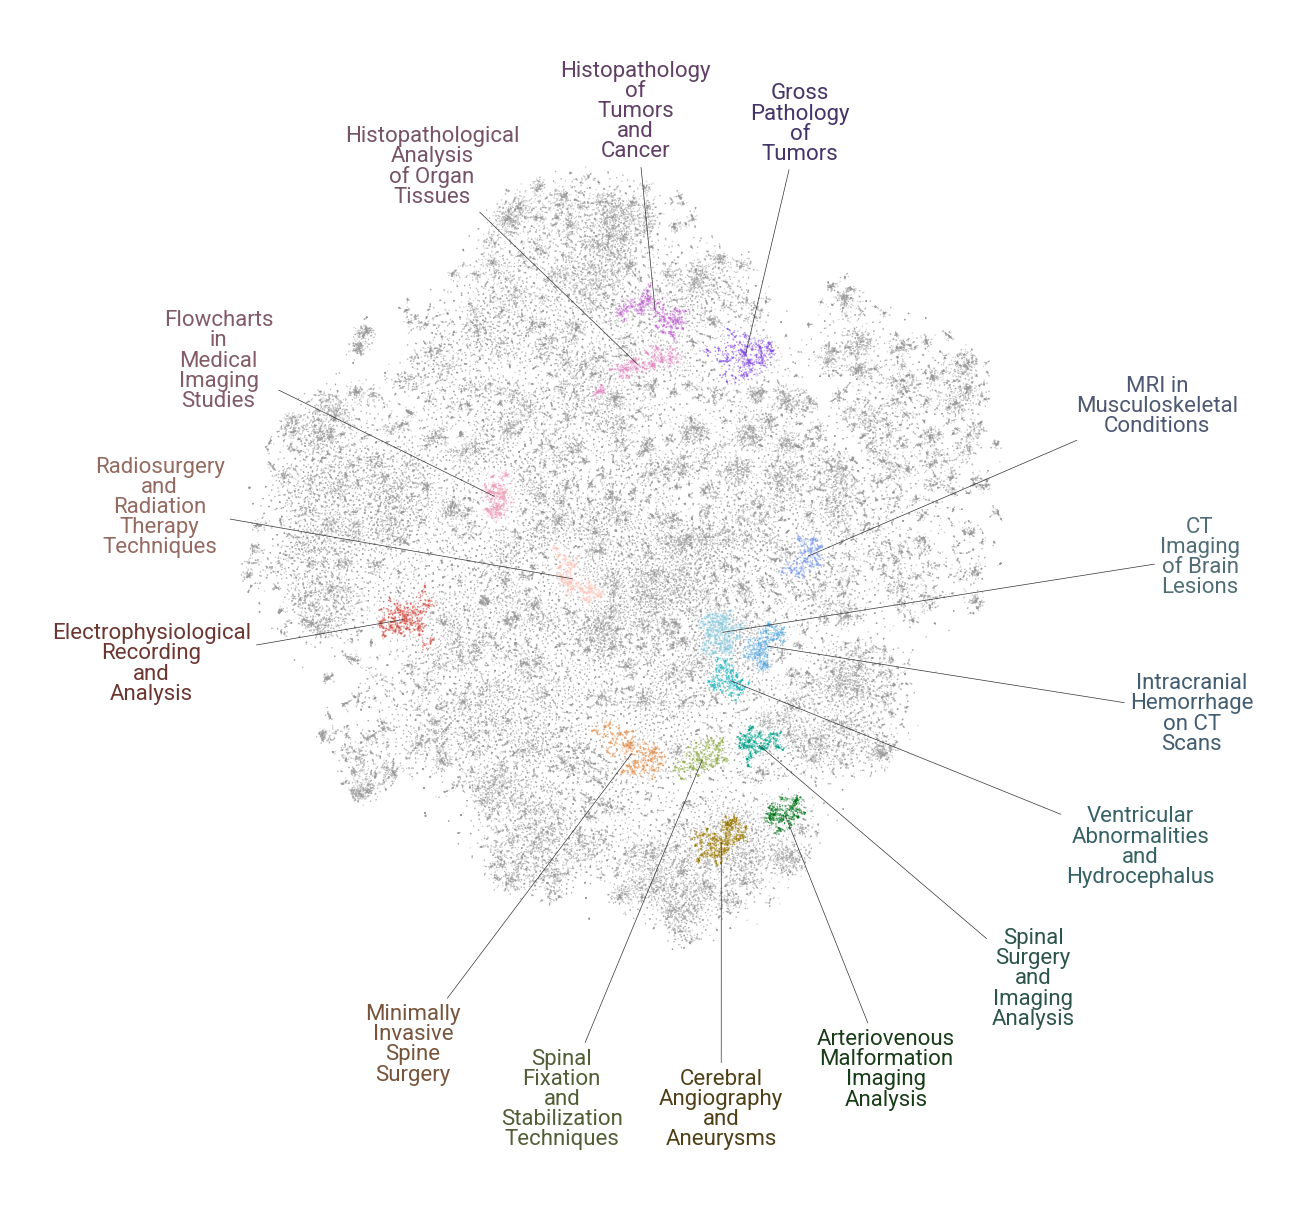

In [15]:
data = filtered_data

# Extract x,y coordinates into positions array for stages 2 and 3
sub_positions = data[['x', 'y']].values

# Get labels from cluster titles 
labels = data['top_topics'].values

fig1, ax1 = datamapplot.create_plot(
    sub_positions,
    labels,
    noise_label="Noise",
    point_size=1,
    alpha=0.5,
    marker_type='o',
    label_font_size=16,
    max_font_size=16,
    min_font_size=4,
    label_base_radius=125,
    min_font_weight=100,
    max_font_weight=1000,
    label_wrap_width=8,
    label_over_points=False,
    force_matplotlib=True,
    dynamic_label_size=True,
    add_glow=True,

    figsize=(13,12),
)

# Remove border
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

fig1.savefig("./figures/obsidian_figure_2b.png",
             format='png',
             dpi=600,
             bbox_inches='tight')
# fig1.savefig("./figures/obsidian_figure_2b.tiff",
#              format='tiff',
#              dpi=600,
#              bbox_inches="tight")

In [16]:
data['stagemode'] = data['stage'] + '_' + data['mode']
print(data['stagemode'].unique())
sm = {'stage_1_align': 'PubMed: Alignment',
 'stage_2_ift': 'PubMed',
 'stage_3_ddx': 'Neurosurgery Publications: DDX',
 'stage_3_ift': 'NeuroPubs',
 'stage_3_mc': 'Neurosurgery Publications: MC'}
data['better_titles'] = data['stagemode'].map(sm)
print(data['better_titles'].unique())

['stage_2_ift' 'stage_3_ift']
['PubMed' 'NeuroPubs']


In [17]:
red = "#ae1a1f"
red_helper_1 = "#cc4125"
red_helper_2 = "#6e1517"
yellow = "#e69138"
blue = "#3c78d8"
grey = "#999999"
green = "#00a67e"
brown = "#b85c00"

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


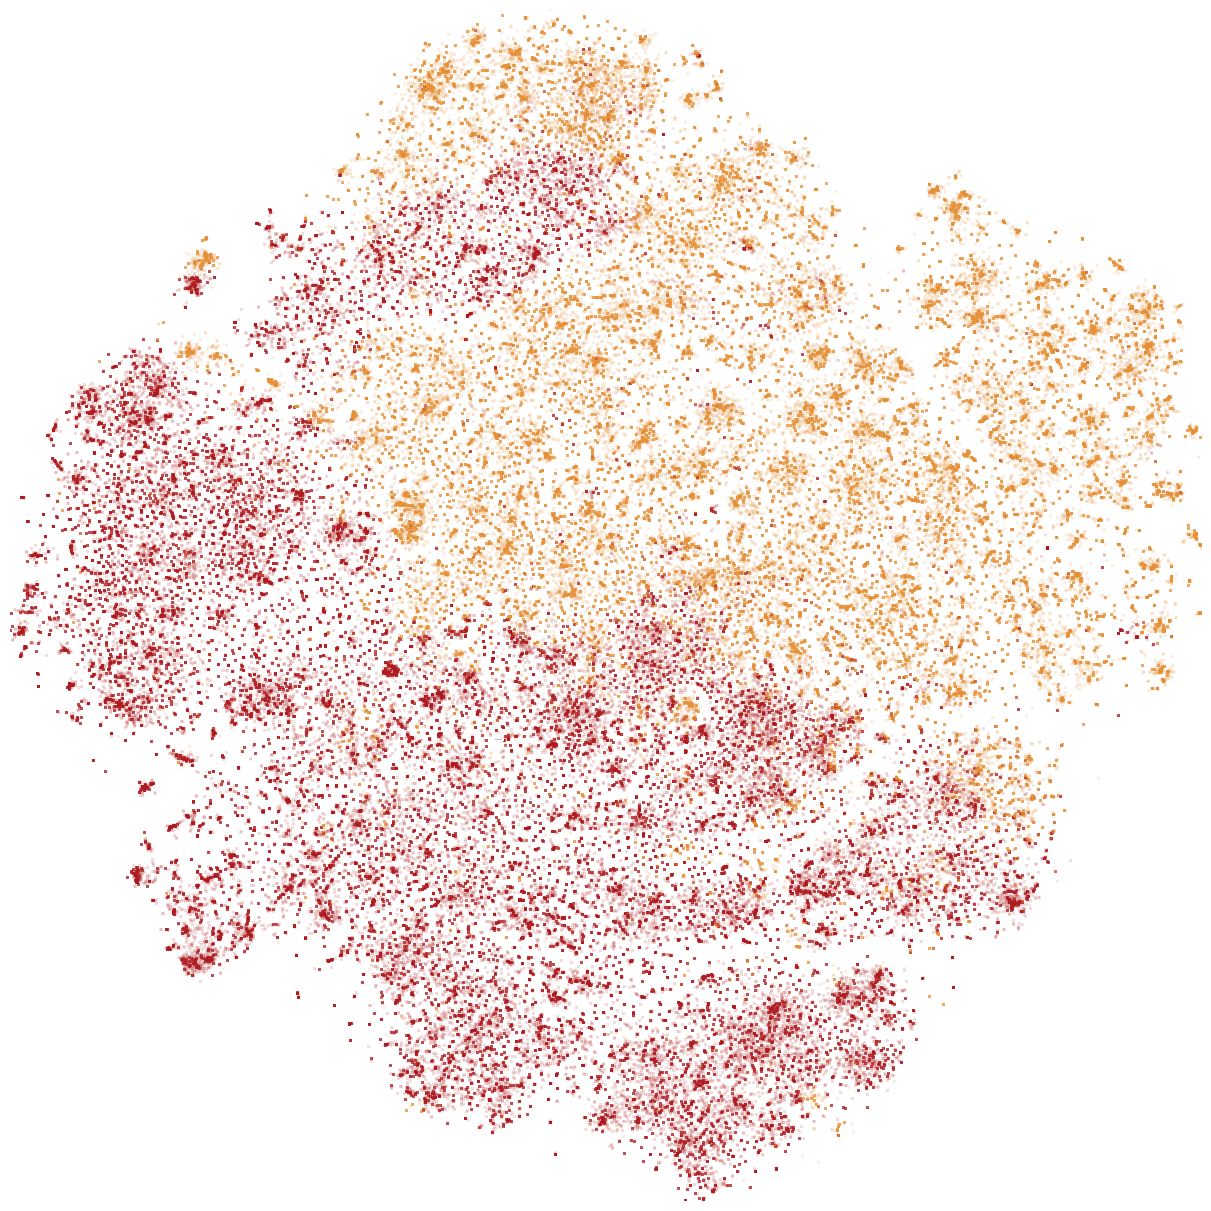

In [18]:
# Get labels from cluster titles 
stage_labels = data['better_titles'].values

# Create color mapping for stages using better_titles
label_color_map = {
    'PubMed: Alignment': blue, 
    'PubMed': yellow,       
    'NeuroPubs': red,
    'Neurosurgery Publications: MC': red_helper_2,
    'Neurosurgery Publications: DDX': red_helper_1,
}
colors = [label_color_map[label] for label in stage_labels]
positions = data[['x', 'y']].values

fig2, ax2 = datamapplot.create_plot(
    positions,
    stage_labels,
    label_color_map=label_color_map,
    noise_label="Noise",
    point_size=1,
    marker_type='o',
    alpha=0.5,
    label_font_size=0,
    label_wrap_width=24,
    label_font_outline_alpha=1.0,
    label_margin_factor=30.0,
    label_over_points=True,
    # dpi=1200,

    figsize=(12,12),
)

# Remove border
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False) 
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

fig2.savefig("./figures/obisdian_figure_2a.png",
             format='png',
             #dpi=1200,
             bbox_inches='tight')
# fig2.savefig("./figures/obsidian_figure_2a.tiff",
#              format='tiff',
#              #dpi=1200,
#              bbox_inches="tight")

/tmp/ipykernel_1536493/2257591461.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=14)


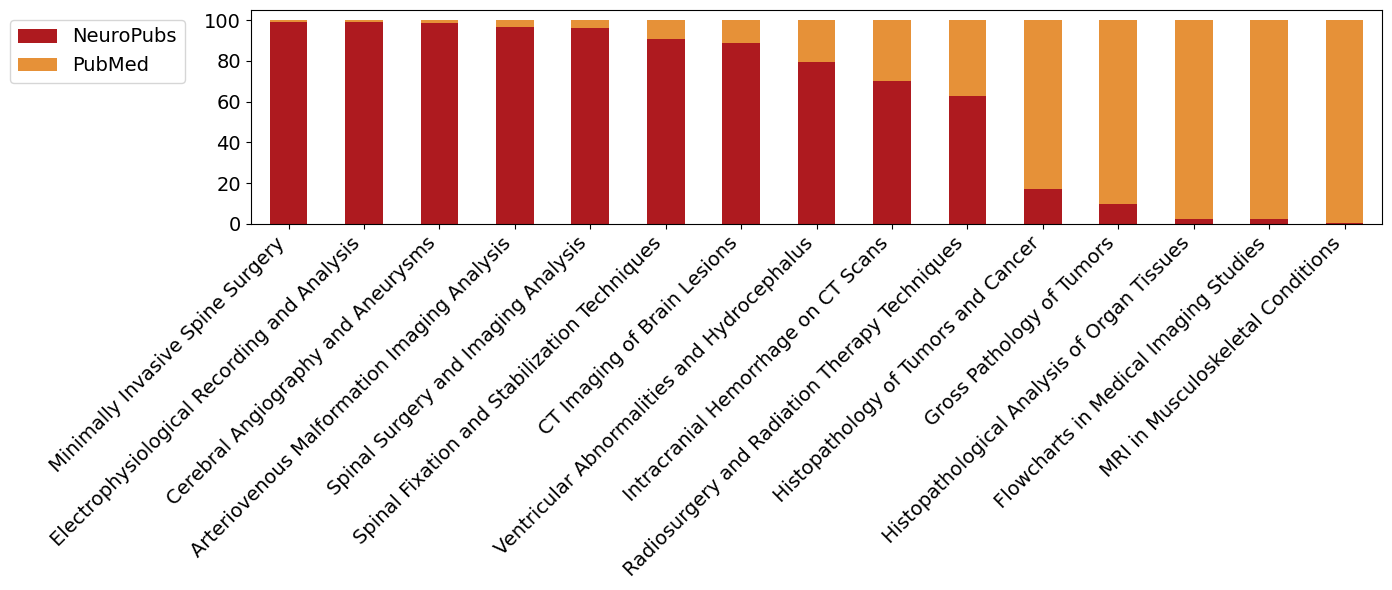

In [19]:
data['cluster_title'] = filtered_data['cluster_title']
pubmed_ift_data = data[data['better_titles'].isin(['PubMed', 'NeuroPubs'])]

import matplotlib.pyplot as plt

# Get the largest 30 cluster_titles based on their frequency
top_30_clusters = pubmed_ift_data['cluster_title'].value_counts().nlargest(16).index

# Filter the data to include only the top 30 cluster_titles
top_30_data = pubmed_ift_data[(pubmed_ift_data['cluster_title'].isin(top_30_clusters)) & (pubmed_ift_data['cluster_title'] != 'Noise')]

# Calculate the percentage of each better_title within the top 30 cluster_titles
percentage_data = top_30_data.groupby(['cluster_title', 'better_titles']).size().unstack(fill_value=0)
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

# Sort the data so that the largest proportion of neurosurgery publications is on the left
percentage_data = percentage_data.sort_values(by='NeuroPubs', ascending=False)

# Define a color map for better_titles
better_title_colors = {
    'PubMed: Alignment': blue, 
    'PubMed': yellow,       
    'NeuroPubs': red,
    'Neurosurgery Publications: MC': red_helper_2,
    'Neurosurgery Publications: DDX': red_helper_1,
}
# Create a stacked bar chart with the defined color map
fig3, ax3 = plt.subplots(figsize=(14, 6))
percentage_data.plot(kind='bar', stacked=True, ax=ax3, color=[better_title_colors.get(x, '#d3d3d3') for x in percentage_data.columns])
ax3.legend(fontsize=14,     bbox_to_anchor=(-.05, 1))
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=14)
ax3.set_xlabel('')  # Remove the x-axis label

fig3.savefig("./figures/obsidian_figure_2c.png",
             format='png', 
             dpi=300,
             bbox_inches='tight')
# fig3.savefig("./figures/obsidian_figure_2c.tiff",
#              format='tiff',
#              dpi=300,
#              bbox_inches="tight") 

plt.tight_layout()
plt.show()